In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
metadata_FMG = pd.read_csv('Metadata_FecalMG.csv', index_col=0,delimiter=",")
#metadata = metadata.dropna()
metadata_FMG = pd.DataFrame(metadata_FMG)

metadata_SG = pd.read_csv('SingaporeCRC_data/SG-BULK_patient_clinical_information.csv', index_col=0,delimiter=",")
#metadata = metadata.dropna()
metadata_SG = pd.DataFrame(metadata_SG)

metadata_TCGA = pd.read_csv('Metadata-TCGA-All-18116-Samples.csv', index_col=0)
metadata_TCGA = metadata_TCGA[metadata_TCGA['investigation'] == 'TCGA-COAD'] # Extract only colon cancer
metadata_TCGA = pd.DataFrame(metadata_TCGA)

In [55]:
stage_mapping = {
    'Stage_I_II': 'Early Stage',
    'Stage_III_IV': 'Late Stage',
}

metadata_FMG['Group'] = metadata_FMG['Group'].replace(stage_mapping)
#metadata_FMG = metadata_FMG[metadata_FMG['Group'] != 'Healthy']

gender_mapping = {
    'M': 'Male',
    'F': 'Female',
}

location_mapping = {
    '-': 'Healthy',
    'Left colon and Right colon': 'Others',
    'Left colon and Rectum': 'Others',
    'Rectum and Left colon': 'Others',
    'Rectum, Left colon and Right colon': 'Others',
}

metadata_FMG['Group'] = metadata_FMG['Group'].replace(stage_mapping)
metadata_FMG['Gender'] = metadata_FMG['Gender'].replace(gender_mapping)
metadata_FMG['Tumor location'] = metadata_FMG['Tumor location'].replace(location_mapping)

metadata_FMG

,Group,Stage,Age,Gender,BMI,Brinkman Index,Alcohol,Tumor location
Patient_id,,,,,,,,
10021,Early Stage,I,57,Male,26.8809517,130,993,Left colon
10023,Healthy,-,65,Male,26.5625,660,0,Healthy
10025,Healthy,-,40,Male,25,400,993,Healthy
10029,Healthy,-,67,Female,20.17325264,0,0,Healthy
10031,Healthy,-,77,Male,24.4646016,300,813,Healthy
...,...,...,...,...,...,...,...,...
12276,Healthy,-,46,Male,21.79944511,0,430,Healthy
12340,Healthy,-,59,Male,26.53375883,0,989.9,Healthy
12370,Healthy,-,65,Female,18.25631871,0,0,Healthy


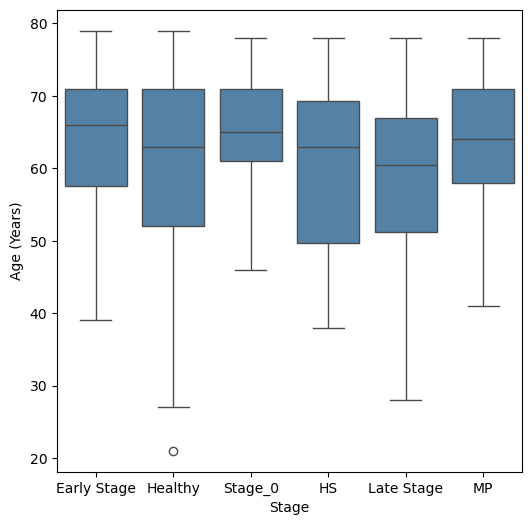

In [56]:
# Plotting the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x=metadata_FMG['Group'], y=metadata_FMG['Age'], color='steelblue')

plt.xlabel('Stage')
plt.ylabel('Age (Years)')
plt.show()

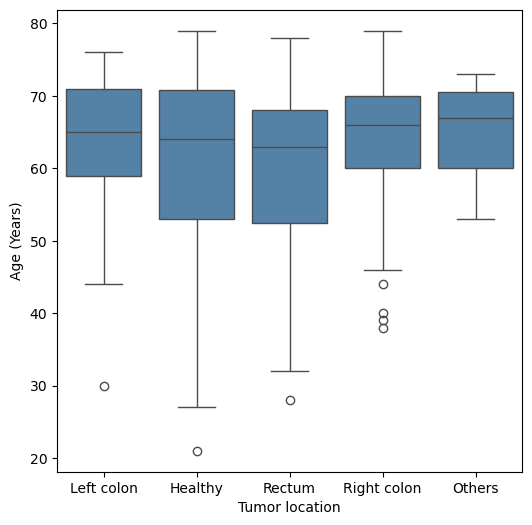

In [58]:
# Plotting the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x=metadata_FMG['Tumor location'], y=metadata_FMG['Age'], color='steelblue')

plt.xlabel('Tumor location')
plt.ylabel('Age (Years)')
#plt.xticks(rotation=45, ha='right')
plt.show()

In [61]:
SG_stage_mapping = {
    'I': 'Early Stage',
    'II': 'Early Stage',
    'III': 'Late Stage',
    'IV': 'Late Stage',
    'IIA': 'Early Stage',
    'IIA': 'Early Stage',
    'IIIB': 'Late Stage',
    'IIIC': 'Late Stage',
    'IIC': 'Early Stage',
    'IIB': 'Early Stage',
    'IIIA': 'Late Stage',
    'IVB': 'Late Stage',
    'IVA': 'Late Stage'
}


metadata_SG['Stage'] = metadata_SG['Stage'].replace(SG_stage_mapping)
metadata_SG

,TMB,KRAS,BRAF,NRAS,TP53,APC,PIK3CA,PIK3R1,SMAD4,ERBB4,...,Age.at.Diagnosis,Site.of.Primary.Colorectal.tumour,Side,Grade,TNM,Stage,iCMS,CMS,group3,group5
patient_id,,,,,,,,,,,,,,,,,,,,,
47,690,mut,wt,wt,wt,mut,mut,wt,wt,mut,...,54.0,Transverse colon,Right,NaN,T4bN0(0/12)M0,Early Stage,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
95,86,mut,wt,wt,mut,mut,wt,wt,wt,wt,...,64.0,Rectosigmoid junction,Left,2,T3N1a(1/40)M1,Late Stage,iCMS2,CMS2,NaN,NaN
106,1028,wt,wt,wt,wt,wt,wt,wt,wt,wt,...,72.0,Transverse colon,Right,3,T4aN2(4/29)M0,Late Stage,iCMS3,CMS1,iCMS3_MSI,iCMS3_MSI
153,80,mut,wt,wt,mut,mut,mut,wt,wt,wt,...,66.0,Sigmoid colon,Left,2,T3N1(1/18)M0,Late Stage,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
269,10,wt,wt,wt,wt,wt,wt,wt,wt,wt,...,54.0,Rectum,Left,2,T1N1c(0/11)M0,Late Stage,iCMS3,CMS4,iCMS3_MSS,iCMS3_fibrotic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1662,74,mut,wt,wt,mut,wt,wt,wt,wt,wt,...,67.0,Rectum,Left,2,T3N1a(1/36)M0,Late Stage,iCMS3,CMS3,iCMS3_MSS,iCMS3_MSS
1664,46,mut,wt,wt,mut,wt,wt,wt,wt,wt,...,62.0,Sigmoid colon,Left,2,T3N2a(6/29)M0,Late Stage,iCMS2,CMS4,iCMS2_MSS,iCMS2_fibrotic
1665,93,mut,wt,wt,mut,mut,wt,wt,wt,wt,...,78.0,Sigmoid colon,Left,2,T3N1c(0/15)M0,Late Stage,iCMS2,CMS2,iCMS2_MSS,iCMS2_MSS


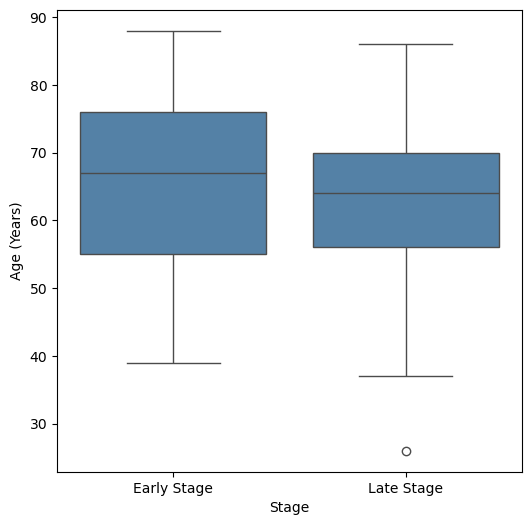

In [62]:
# Plotting the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x=metadata_SG['Stage'], y=metadata_SG['Age.at.Diagnosis'], color='steelblue')

#plt.xlabel('Stage')
plt.ylabel('Age (Years)')
plt.show()

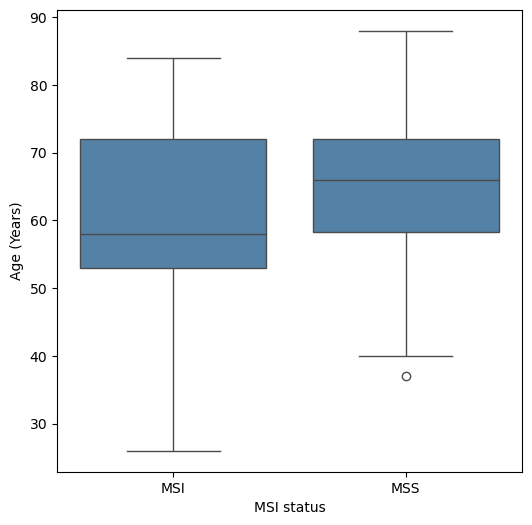

In [67]:
# Plotting the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x=metadata_SG['MSI.Status'], y=metadata_SG['Age.at.Diagnosis'], color='steelblue')

plt.xlabel('MSI status')
plt.ylabel('Age (Years)')
plt.show()

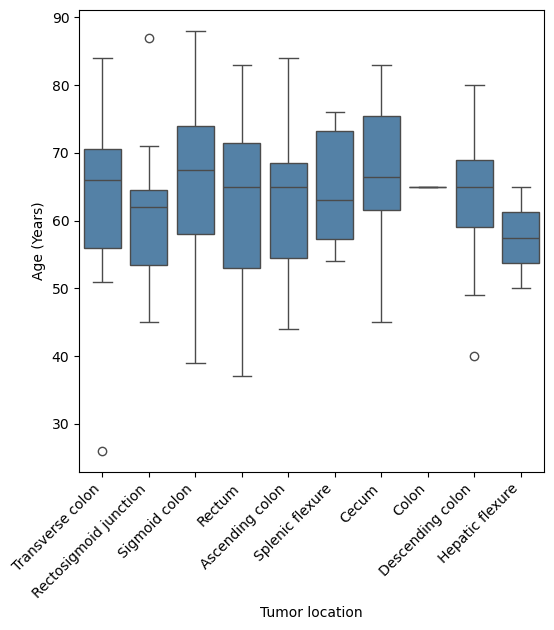

In [68]:
# Plotting the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x=metadata_SG['Site.of.Primary.Colorectal.tumour'], y=metadata_SG['Age.at.Diagnosis'], color='steelblue')

plt.xlabel('Tumor location')
plt.ylabel('Age (Years)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [75]:
TCGA_gender_mapping = {
    'MALE': 'Male',
    'FEMALE': 'Female',
}

ST_mapping = {
    'Metastatic': 'Others',
    'Recurrent Tumor': 'Others',
}

metadata_TCGA['gender'] = metadata_TCGA['gender'].replace(TCGA_gender_mapping)
metadata_TCGA['sample_type'] = metadata_TCGA['sample_type'].replace(ST_mapping)
metadata_TCGA

,gdc_file_uuid,filename,age_at_diagnosis,aliquot_uuid,case_uuid,days_to_death,disease_type,ethnicity,experimental_strategy,gender,...,aliquot_concentration,analyte_A260A280Ratio,analyte_amount,analyte_type_label,radiation_therapy_code_label,radiation_therapy_site_label,radiation_therapy_type_label,year_of_diagnosis,vital_status_label,dataset
s13008,5DCDB663-BC72-4928-970A-2C50103CF337,UNCID_340264.TCGA-AZ-4615-01A-01R-1410-07.1103...,84.0,6805B5DA-D028-436D-85A7-1D151DA16731,bf69a4ce-ec7e-4752-a86d-dcc80e3c9a57,NaN,Colon Adenocarcinoma,NOT HISPANIC OR LATINO,RNA-Seq,Male,...,0.14,1.80,147.30,RNA,NaN,NaN,NaN,2009.0,Alive,Dataset 3
s12994,5220B7B2-6F81-4C7F-BFB4-B523C2C30DDF,UNCID_269004.TCGA-AA-A02R-01A-01R-A00A-07.1008...,84.0,3B40E36D-725C-4291-BEED-3FD394238B98,764c97c9-01d3-45cb-86bd-f8a52b5468da,670.0,Colon Adenocarcinoma,Not available,RNA-Seq,Female,...,0.15,1.72,132.38,RNA,NaN,NaN,NaN,2006.0,Dead,Dataset 3
s13005,95F7BD48-5E28-4892-BC8D-A6DEC3B02D70,UNCID_339870.TCGA-AA-3488-01A-01R-1410-07.1103...,58.0,98E3C8DD-71B9-4944-B7BB-AA216AAAC0AB,6e9e0c2f-2ddb-40f1-8e8c-618119e62ec1,153.0,Colon Adenocarcinoma,Not available,RNA-Seq,Male,...,0.17,1.80,583.30,RNA,NaN,NaN,NaN,2002.0,Dead,Dataset 3
s12987,78F6E4E8-1349-43CB-AAA7-C56FD833DEDD,UNCID_269354.TCGA-AA-3815-01A-01R-1022-07.1008...,65.0,EE944FBE-C1DE-4060-B05F-81CDE4EC0C27,b16bb717-d1cf-4237-a554-43f3995b82f2,NaN,Colon Adenocarcinoma,Not available,RNA-Seq,Female,...,0.14,1.80,438.30,RNA,NaN,NaN,NaN,2007.0,Alive,Dataset 3
s12895,D04CC01A-3CCB-4FC1-BAD8-2EDE20790454,UNCID_1590129.79b022ed-6ef5-4140-9cd1-04c8af58...,66.0,79B022ED-6EF5-4140-9CD1-04C8AF58A9DF,7dfbc0ed-e684-4966-8b59-fb6b9e80c129,NaN,Colon Adenocarcinoma,Not available,RNA-Seq,Male,...,0.13,1.80,533.30,RNA,NaN,NaN,NaN,2009.0,Alive,Dataset 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s13862,36293F9B-A284-467E-AB73-AE62FC5EAB6E,UNCID_258932.TCGA-AA-A01G-01A-01R-A002-07.1006...,63.0,9D737CC8-0854-4559-AB65-B43485DDC035,6f2b5a14-569c-4084-8c67-b1a44d787897,NaN,Colon Adenocarcinoma,Not available,RNA-Seq,Male,...,0.15,1.73,239.76,RNA,NaN,NaN,NaN,2009.0,Alive,Dataset 3
s13849,86E4599E-AB45-4118-B105-32782288A0D3,UNCID_1618504.9c1d30c4-c8f0-4ca7-bec7-243f81b7...,72.0,9C1D30C4-C8F0-4CA7-BEC7-243F81B7680A,ff1407c6-9174-4bae-a19b-d34ca71b898c,NaN,Colon Adenocarcinoma,NOT HISPANIC OR LATINO,RNA-Seq,Female,...,0.15,1.80,877.30,RNA,NaN,NaN,NaN,2009.0,Alive,Dataset 3
s13857,CCC44CA2-2E42-4083-9252-597D398BE401,UNCID_1948345.0dc7cb6e-bb27-4da5-90ed-c062dc9f...,69.0,0DC7CB6E-BB27-4DA5-90ED-C062DC9FDA0B,14c13b05-abfe-472e-83a9-b28f60e58ad8,NaN,Colon Adenocarcinoma,NOT HISPANIC OR LATINO,RNA-Seq,Male,...,0.14,1.70,19.80,RNA,951909FD-4B2B-4D3F-918A-34269D0A70FC,Primary Tumor Field,EXTERNAL BEAM,2008.0,Alive,Dataset 3
s13839,0DD44906-041D-4AF2-8F42-A1BED185E1C6,TCGA-AA-A01T-01A-21D-A079-02_110402_SN208_0200...,63.0,8F61B113-0E19-403E-9637-48E9D9733692,f87c6dcc-1a9e-4df5-962c-1f946e2611f8,NaN,Colon Adenocarcinoma,Not available,WGS,Female,...,0.14,2.03,80.04,DNA,NaN,NaN,NaN,2004.0,Alive,Dataset 3


In [76]:
metadata_TCGA.columns

Index(['gdc_file_uuid', 'filename', 'age_at_diagnosis', 'aliquot_uuid',
       'case_uuid', 'days_to_death', 'disease_type', 'ethnicity',
       'experimental_strategy', 'gender', 'investigation', 'platform',
       'primary_site', 'race', 'reference_genome', 'sample_type',
       'sample_uuid', 'vital_status', 'tissue_source_site_label',
       'data_submitting_center_label', 'country_of_sample_procurement',
       'histological_diagnosis_label', 'pathologic_t_label',
       'pathologic_n_label', 'pathologic_stage_label', 'icd03_histology_label',
       'icd03_histology_site', 'icd10', 'portion_is_ffpe',
       'new_tumor_event_after_initial_trtmt',
       'primary_therapy_outcome_success_label', 'portion_weight',
       'aliquot_concentration', 'analyte_A260A280Ratio', 'analyte_amount',
       'analyte_type_label', 'radiation_therapy_code_label',
       'radiation_therapy_site_label', 'radiation_therapy_type_label',
       'year_of_diagnosis', 'vital_status_label', 'dataset'],
      

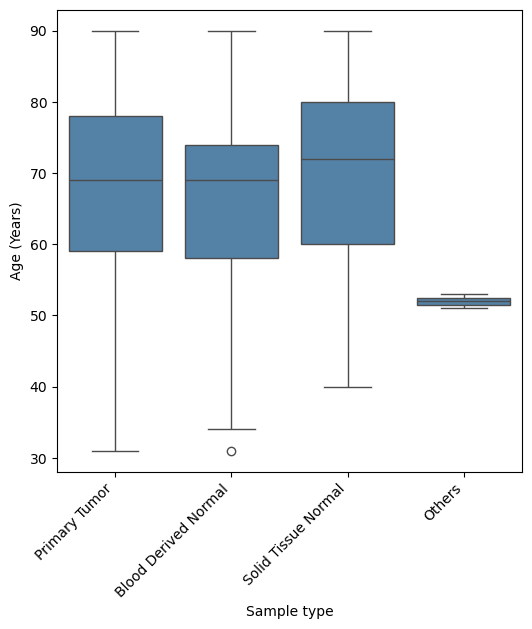

In [93]:
# Plotting the box plot
plt.figure(figsize=(6, 6))
sns.boxplot(x=metadata_TCGA['sample_type'], y=metadata_TCGA['age_at_diagnosis'], color='steelblue')

plt.xlabel('Sample type')
plt.ylabel('Age (Years)')
plt.xticks(rotation=45, ha='right')
plt.show()

In [94]:
# Adding a column to identify the dataset
metadata_SG['dataset'] = 'SG-Bulk'
metadata_FMG['dataset'] = 'Fecal-MG'
metadata_TCGA['dataset'] = 'TCGA'

metadata_TCGA = metadata_TCGA.rename(columns={'gender': 'Gender'})

# Combining the datasets
combined_df = pd.concat([metadata_SG, metadata_FMG, metadata_TCGA])
combined_df = combined_df[combined_df['Gender'] != 'Not available']
combined_df

,TMB,KRAS,BRAF,NRAS,TP53,APC,PIK3CA,PIK3R1,SMAD4,ERBB4,...,portion_weight,aliquot_concentration,analyte_A260A280Ratio,analyte_amount,analyte_type_label,radiation_therapy_code_label,radiation_therapy_site_label,radiation_therapy_type_label,year_of_diagnosis,vital_status_label
47,690.0,mut,wt,wt,wt,mut,mut,wt,wt,mut,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,86.0,mut,wt,wt,mut,mut,wt,wt,wt,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,1028.0,wt,wt,wt,wt,wt,wt,wt,wt,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
153,80.0,mut,wt,wt,mut,mut,mut,wt,wt,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
269,10.0,wt,wt,wt,wt,wt,wt,wt,wt,wt,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s13862,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,110.0,0.15,1.73,239.76,RNA,NaN,NaN,NaN,2009.0,Alive
s13849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,129.0,0.15,1.80,877.30,RNA,NaN,NaN,NaN,2009.0,Alive
s13857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,36.0,0.14,1.70,19.80,RNA,951909FD-4B2B-4D3F-918A-34269D0A70FC,Primary Tumor Field,EXTERNAL BEAM,2008.0,Alive
s13839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,30.0,0.14,2.03,80.04,DNA,NaN,NaN,NaN,2004.0,Alive


In [95]:
class_counts = combined_df['Gender'].value_counts()
print(class_counts)

Gender
Male      956
Female    833
Name: count, dtype: int64


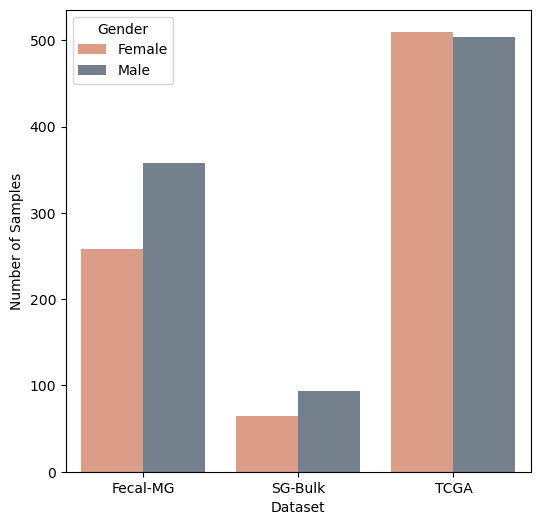

In [96]:
# Count the number of samples for each combination of dataset and gender
dataset_gender_counts = combined_df.groupby(['dataset', 'Gender']).size().reset_index(name='count')

# Custom color palette
custom_palette = {
    'Male': 'slategrey',
    'Female': 'darksalmon'
}

# Plotting the bar plot with custom colors
plt.figure(figsize=(6, 6))
sns.barplot(x='dataset', y='count', hue='Gender', data=dataset_gender_counts, palette=custom_palette)

plt.xlabel('Dataset')
plt.ylabel('Number of Samples')
plt.legend(title='Gender')
plt.show()